# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set the scale of temperature in degrees f
units = "imperial"

# make the call go get the temperature data
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# variables for list storage
city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# count cities in batches
item = 1
batch = 1


In [4]:
# Starting the collection progress notification
print(" Searching Cities of the World")
print("*******************************")

# create a list of cities to fill the dataframe
for city in cities:
    query_url = base_url + city
    data = requests.get(query_url).json()
    
    # to prevent premature halt on errors
    try:
        print(f"Getting weather for City {item} of of group {batch} : {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        # Count the cities 
        item += 1
        
        # Don't exceed the api call limit
        if item > 50:
            batch += 1
            item = 1
            time.sleep(1)
    
    except:
        print(f"City {city} isn't reporting weather. Trying again")
        
# End of the list
print("*************************")
print("   City List complete    ")
print("*************************")

 Searching Cities of the World
*******************************
Getting weather for City 1 of of group 1 : chokurdakh
Getting weather for City 2 of of group 1 : hilo
Getting weather for City 3 of of group 1 : nikolskoye
Getting weather for City 4 of of group 1 : ancud
Getting weather for City 5 of of group 1 : cururupu
Getting weather for City 6 of of group 1 : busselton
Getting weather for City 7 of of group 1 : esperance
Getting weather for City 8 of of group 1 : port alfred
Getting weather for City 9 of of group 1 : xining
Getting weather for City 10 of of group 1 : key west
Getting weather for City 11 of of group 1 : arlit
Getting weather for City 12 of of group 1 : meulaboh
Getting weather for City 13 of of group 1 : kavieng
Getting weather for City 14 of of group 1 : watertown
Getting weather for City 15 of of group 1 : baykalsk
Getting weather for City 16 of of group 1 : cabo san lucas
Getting weather for City 17 of of group 1 : rikitea
Getting weather for City 18 of of group 1 :

Getting weather for City 37 of of group 3 : dalianwan
Getting weather for City 38 of of group 3 : attawapiskat
City attawapiskat isn't reporting weather. Trying again
Getting weather for City 38 of of group 3 : saskylakh
Getting weather for City 39 of of group 3 : vardo
Getting weather for City 40 of of group 3 : yerbogachen
Getting weather for City 41 of of group 3 : moose factory
Getting weather for City 42 of of group 3 : khandbari
Getting weather for City 43 of of group 3 : champerico
Getting weather for City 44 of of group 3 : marsassoum
Getting weather for City 45 of of group 3 : east london
Getting weather for City 46 of of group 3 : rio grande
Getting weather for City 47 of of group 3 : saint-philippe
Getting weather for City 48 of of group 3 : tuktoyaktuk
Getting weather for City 49 of of group 3 : toshkivka
Getting weather for City 50 of of group 3 : long beach
Getting weather for City 1 of of group 4 : lake havasu city
Getting weather for City 2 of of group 4 : sainte-suzann

Getting weather for City 17 of of group 6 : nizhneyansk
City nizhneyansk isn't reporting weather. Trying again
Getting weather for City 17 of of group 6 : fukue
Getting weather for City 18 of of group 6 : ulladulla
Getting weather for City 19 of of group 6 : chagda
City chagda isn't reporting weather. Trying again
Getting weather for City 19 of of group 6 : artyk
City artyk isn't reporting weather. Trying again
Getting weather for City 19 of of group 6 : storforshei
Getting weather for City 20 of of group 6 : samusu
City samusu isn't reporting weather. Trying again
Getting weather for City 20 of of group 6 : puerto ayora
Getting weather for City 21 of of group 6 : coquimbo
Getting weather for City 22 of of group 6 : sainte-marie
Getting weather for City 23 of of group 6 : meridian
Getting weather for City 24 of of group 6 : alofi
Getting weather for City 25 of of group 6 : mys shmidta
City mys shmidta isn't reporting weather. Trying again
Getting weather for City 25 of of group 6 : ang

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Sort and store data and create the dataframe
city_data_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": date,
                                "Lat": city_lats,
                                "Lng": city_lngs,
                                "Max Temp (F)": city_maxtemps,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudiness,
                                "Wind Speed (mph)": city_windspeed,
                                })
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")

# check that the dataframe works
city_data_df
city_data_df.to_csv("../output_file.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
over_100 = city_data_df.loc[city_data_df["Humidity (%)"] > 100, :]


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

if over_100.empty == True:
    print("Nothing to do here")
    latitudes = city_data_df["Lat"]
    temperatures = city_data_df["Max Temp (F)"]
    humidity = city_data_df["Humidity (%)"]
    cloudiness = city_data_df["Cloudiness (%)"]
    windspeed = city_data_df["Wind Speed (mph)"]

    # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".    
else:
    over_100Index = over_100.index
    
    clean_city_data = city_data_df.drop(over100Index).reset_index(drop=True)
    clean_city_data.head()
    
    # drops irrelivent data and makes a new df
    latitudes = clean_city_data["Lat"]
    temperatures = clean_city_data["Max Temp (F)"]
    humidity = clean_city_data["Humidity (%)"]
    cloudiness = clean_city_data["Cloudiness (%)"]
    windspeed = clean_city_data["Wind Speed (mph)"]


Nothing to do here


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

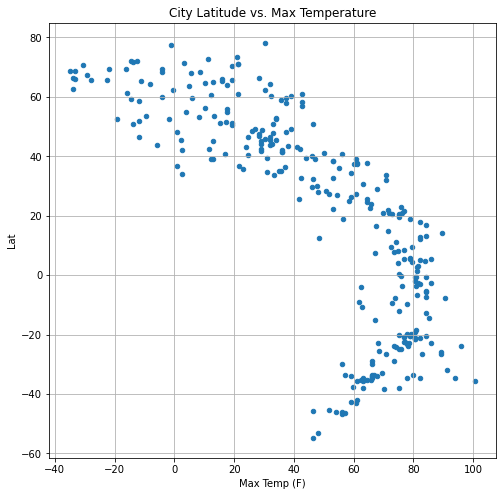

<Figure size 432x288 with 0 Axes>

In [8]:
# Latitude vs. Temperature for the city_data
city_data_df.plot(kind="scatter", x="Max Temp (F)", y="Lat", grid=True, figsize=(8,8),
              title="City Latitude vs. Max Temperature")
plt.show()
plt.tight_layout()
plt.savefig("../latitude_v_temp.png")

### Global max temp plot confirm extreme temperatures trend towards the equator.

## Latitude vs. Humidity Plot

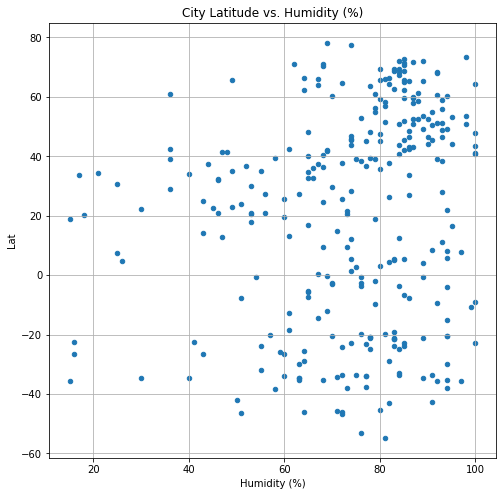

<Figure size 432x288 with 0 Axes>

In [9]:
# Latitude vs. Humidity for the city_data
city_data_df.plot(kind="scatter", x="Humidity (%)", y="Lat", grid=True, figsize=(8,8),
              title="City Latitude vs. Humidity (%)")
plt.show()
plt.tight_layout()
plt.savefig("../latitude_v_humidty.png")

### Global humidity overview proves the further away from the equator, the greater the possibilty of moist air. 

## Latitude vs. Cloudiness Plot

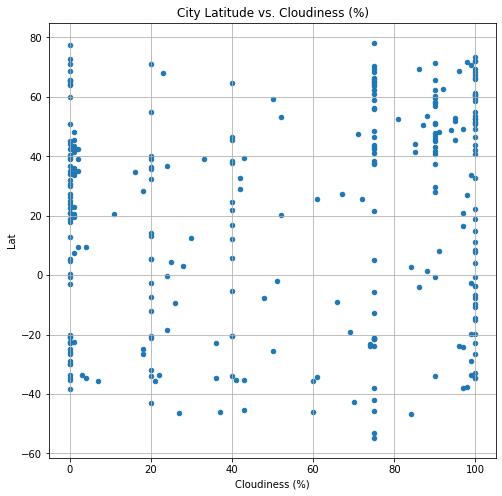

<Figure size 432x288 with 0 Axes>

In [10]:
# Latitude vs. Cloudiness for the city_data
city_data_df.plot(kind="scatter", x="Cloudiness (%)", y="Lat", grid=True, figsize=(8,8),
              title="City Latitude vs. Cloudiness (%)")
plt.show()
plt.tight_layout()
plt.savefig("../latitude_v_Cloudiness.png")

### Overview of global cloudiness. Cloudiness seems to be completely random and is not based on Lat.

## Latitude vs. Wind Speed Plot

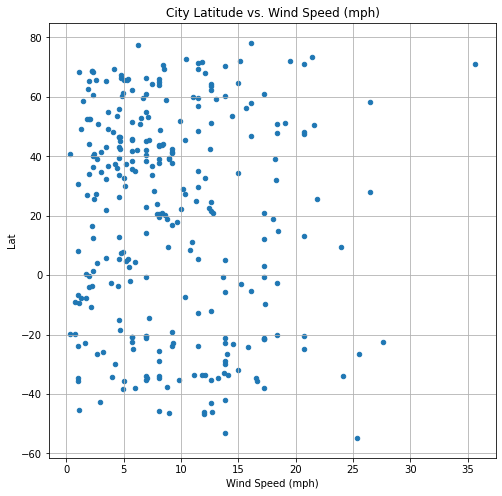

<Figure size 432x288 with 0 Axes>

In [11]:
# Latitude vs. Wind Speed for the city_data
city_data_df.plot(kind="scatter", x="Wind Speed (mph)", y="Lat", grid=True, figsize=(8,8),
              title="City Latitude vs. Wind Speed (mph)")
plt.show()
plt.tight_layout()
plt.savefig("../latitude_v_Wind.png")

### Overview of global wind speeds. Higher wind speeds don't seem to appear closer to the equator. 

## Linear Regression

In [12]:
def plot_linear_regression(x, y, ax=None, **kwargs):
    
    ax = ax
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f"Linear Regression Completed...")    
    print(f"The R Squared is: {rvalue**2}")

    # y = m * x + b
    regress_values = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.plot(x, regress_values, color="r")
    return ax, line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
# Determine Northern Hemisphere Cities
if over_100.empty == True:
    northern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] >= 0, :].copy().reset_index(drop=True)
else:
    northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0, :].copy().reset_index(drop=True)
    
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp (F)"]
north_humidity = northern_hemisphere["Humidity (%)"]
north_cloudiness = northern_hemisphere["Cloudiness (%)"]
north_windspeed = northern_hemisphere["Wind Speed (mph)"]

# Determine Southern Hemisphere Cities
if over_100.empty == True:
    southern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] < 0, :].copy().reset_index(drop=True)
else:
    southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0, :].copy().reset_index(drop=True)
    
south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp (F)"]
south_humidity = southern_hemisphere["Humidity (%)"]
south_cloudiness = southern_hemisphere["Cloudiness (%)"]
south_windspeed = southern_hemisphere["Wind Speed (mph)"]

NameError: name 'cities_temps_df' is not defined

In [ ]:
# Create the scatter plot add labels and markers
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_temperatures, north_latitudes, marker="o", facecolors="r", edgecolors="b")
plt.title("Max Temperature by Latitude for Cities in the Northern Hemisphere", fontsize=16)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Max Temperature (F)", fontsize=12)
plt.grid()

# plot liner regression line over the data
ax, line_eq = plot_linear_regression(north_temperatures, north_latitudes, ax)
plt.annotate(line_eq,(-10,20),fontsize=16,color="black")

plt.show()
plt.savefig("../NH_Temps.png")

#### Temperatures in the Northern hemisphere are effected by the cities proximity towards the equator. The lower temperatures are almost always furthest away. The regression line shows a direct coorilation between latitude and temperature.

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Create the scatter plot add labels and markers
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_temperatures, south_latitudes, marker="o", facecolors="r", edgecolors="b")
plt.title("Max Temperature by Latitude for Cities in the Southern Hemisphere", fontsize=16)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Max Temperature (F)", fontsize=12)
plt.grid()

# plot liner regression line over the data
ax, line_eq = plot_linear_regression(south_temperatures, south_latitudes, ax)
plt.annotate(line_eq,(50,-20),fontsize=16,color="black")

plt.show()
plt.savefig("../SH_Temps.png")

#### Max temperatures in the Southern Hemisphere show a similar trend, the closer to the equater you are the higher the temps. The linear regression line shows a positive coorilation between latitude and temperature.

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Create the scatter plot add labels and markers
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_humidity, north_latitudes, marker="o", facecolors="r", edgecolors="b")
plt.title("Humidity by Latitude for Cities in the Northern Hemisphere", fontsize=16)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Humidity (%)", fontsize=12)
plt.grid()

# plot liner regression line over the data
ax, line_eq = plot_linear_regression(north_latitudes, north_humidity, ax)
plt.annotate(line_eq,(20,45),fontsize=16,color="black")

plt.show()
plt.savefig("../NH_Humidity.png")

#### There appears to be a weak coorilation beween the amount of moisture in the air and the distance away from the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Create the scatter plot add labels and markers
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_humidity, marker="o", facecolors="r", edgecolors="b")
plt.title("Humidity by Latitude for Cities in the Southern Hemisphere", fontsize=16)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Humidity (%)", fontsize=12)
plt.grid()

# plot liner regression line over the data
ax, line_eq = plot_linear_regression(south_latitudes, south_humidity, ax)
plt.annotate(line_eq,(-55,45),fontsize=16,color="black")

plt.show()
plt.savefig("../SH_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Create the scatter plot add labels and markers
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_cloudiness, north_latitudes, marker="o", facecolors="r", edgecolors="b")
plt.title("Cloudiness by Latitude for Cities in the Northern Hemisphere", fontsize=16)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Cloudiness (%)", fontsize=12)
plt.grid()

# plot liner regression line over the data
ax, line_eq = plot_linear_regression(north_cloudiness, north_latitudes, ax)
plt.annotate(line_eq,(50,45),fontsize=16,color="black")

plt.show()
plt.savefig("../NH_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Create the scatter plot add labels and markers
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_cloudiness, south_latitudes, marker="o", facecolors="r", edgecolors="b")
plt.title("Cloudiness by Latitude for Cities in the Southern Hemisphere", fontsize=16)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Cloudiness (%)", fontsize=12)
plt.grid()

# plot liner regression line over the data
ax, line_eq = plot_linear_regression(south_cloudiness, south_latitudes, ax)
plt.annotate(line_eq,(20,-45),fontsize=16,color="black")

plt.show()
plt.savefig("../SH_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Create the scatter plot add labels and markers
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_windspeed, north_latitudes, marker="o", facecolors="r", edgecolors="b")
plt.title("Wind Speed by Latitude for Cities in the Northern Hemisphere", fontsize=16)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Wind Speed (mph)", fontsize=12)
plt.grid()

# plot liner regression line over the data
ax, line_eq = plot_linear_regression(north_windspeed, north_latitudes, ax)
plt.annotate(line_eq,(10,20),fontsize=16,color="black")

plt.show()
plt.savefig("../NH_Wind_Speeds.png")

### Linear regression line shows that there is likely not a coorilation between the wind speed and the and the distance away from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Create the scatter plot add labels and markers
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_windspeed, south_latitudes, marker="o", facecolors="r", edgecolors="b")
plt.title("Wind Speed by Latitude for Cities in the Southern Hemisphere", fontsize=16)
plt.xlabel("Wind Speed (mph)", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid()

# plot liner regression line over the data
ax, line_eq = plot_linear_regression(south_windspeed, south_latitudes, ax)
plt.annotate(line_eq,(20,-10),fontsize=16,color="black")

plt.show()
plt.savefig("../SH_Wind_Speeds.png")

### Linear regression line shows that there is likely not a coorilation between the wind speed and the and the distance away from the equator.